<a href="https://colab.research.google.com/github/dsmohiit/Machine-Learning-Repo/blob/main/Gradient_Descent_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [196]:
x, y = make_regression(n_samples= 4, n_features= 1, n_targets= 1, n_informative= 1, noise= 80, random_state= 13)

In [197]:
x

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

In [198]:
y

array([  7.21786552,  16.04609925, -27.83756166, 144.36688189])

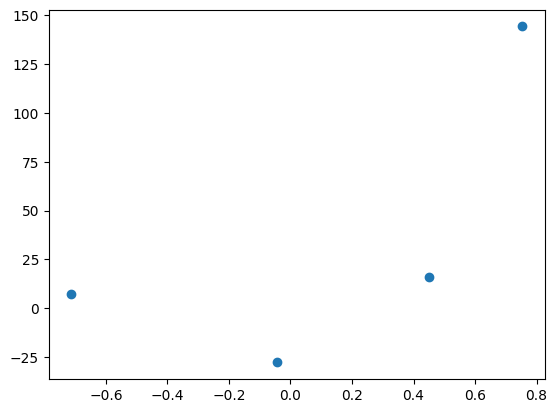

In [199]:
plt.scatter(x, y)

# Applying Ordinary Least Square

In [200]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [201]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[ 0.75376638]
 [-0.71239066]
 [-0.04450308]]
[[0.45181234]]
[144.36688189   7.21786552 -27.83756166]
[16.04609925]


In [202]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [203]:
model.fit(x_train, y_train)

LinearRegression()

In [204]:
y_pred = model.predict(x_test)
y_pred = y_pred.reshape(-1)
y_pred

array([85.39180441])

In [205]:
model.coef_

array([97.47659341])

In [206]:
model.intercept_

np.float64(41.350676770551445)

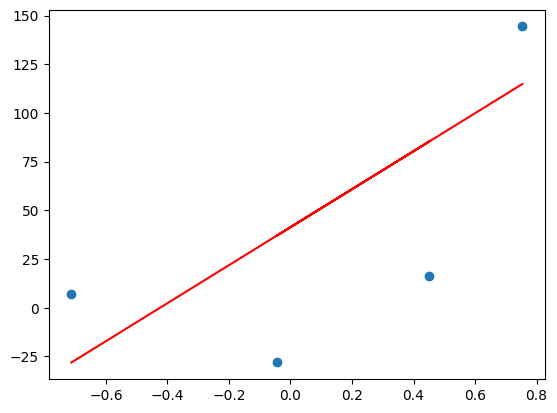

In [207]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), color= "red")

In [208]:
print("The value of m (slope) using OLS: ", round(model.coef_[0], 2))
print("The value of b (intercept) using OLS: ", round(model.intercept_, 2))

The value of m (slope) using OLS:  97.48
The value of b (intercept) using OLS:  41.35


# Applying Gradient Descent

In [209]:
# Applying gradient descent assuming slope (m) is constant i.e. 97.48
# and assume the random-starting value of intercept (b) in 0.

In [210]:
m = 97.48
b = 0

y_pred = (m * x + b).reshape(4)
y_pred

array([-69.44384174,  44.04266678,  -4.33816008,  73.47714659])

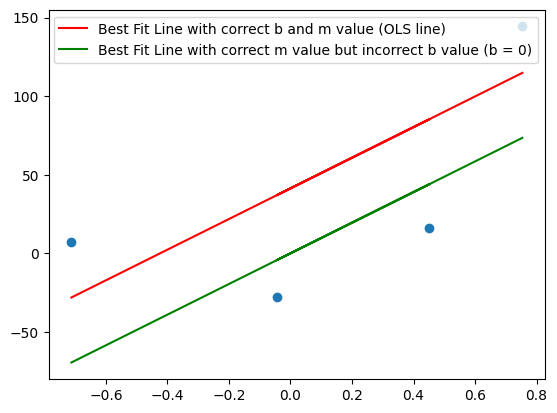

In [211]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), color= "red", label= "Best Fit Line with correct b and m value (OLS line)")
plt.plot(x, y_pred, color= "green", label= "Best Fit Line with correct m value but incorrect b value (b = 0)")
plt.legend()

In [212]:
# FIRST ITERATION

# b_new = b_old - learning_rate * slope(using old b value)

# Slope at b = 0
loss_slope = -2 * np.sum(y - m * x.ravel() - b)
print(loss_slope)

-192.1109468614274


In [213]:
# learning rate
lr = 0.1

# step size
step_size = lr * loss_slope
print(step_size)

-19.211094686142744


In [214]:
# Calculating new b value
b = b - step_size
print(b)

19.211094686142744


In [215]:
y_pred2 = (97.48 * x + b).reshape(4)
y_pred2

array([-50.23274705,  63.25376147,  14.87293461,  92.68824128])

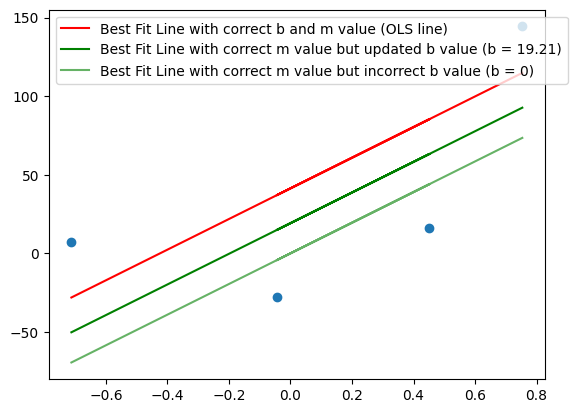

In [216]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), color= "red", label= "Best Fit Line with correct b and m value (OLS line)")
plt.plot(x, y_pred2, color= "green", label= "Best Fit Line with correct m value but updated b value (b = 19.21)")
plt.plot(x, y_pred, color= "green", label= "Best Fit Line with correct m value but incorrect b value (b = 0)", alpha= 0.6)
plt.legend(loc='upper left')

In [217]:
# SECOND ITERATION

# b_new = b_old - learning_rate * slope(using old b value)

# Slope at b = 0
loss_slope = -2 * np.sum(y - m * x.ravel() - b)
print(loss_slope)

-38.42218937228546


In [218]:
# learning rate
lr = 0.1

# step size
step_size = lr * loss_slope
print(step_size)

-3.8422189372285462


In [219]:
# Calculating new b value
b = b - step_size
print(b)

23.053313623371288


In [220]:
y_pred3 = (m * x + b).reshape(4)
y_pred3

array([-46.39052811,  67.0959804 ,  18.71515355,  96.53046022])

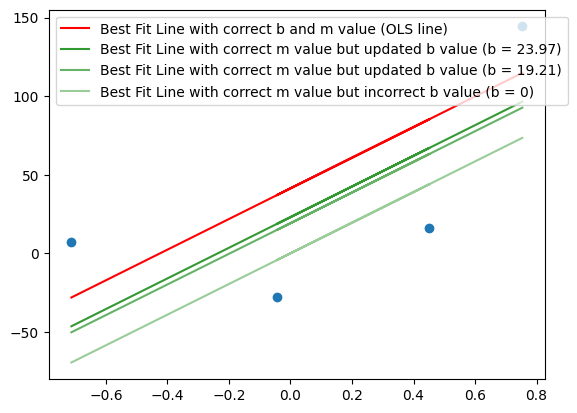

In [221]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), color= "red", label= "Best Fit Line with correct b and m value (OLS line)")
plt.plot(x, y_pred3, color= "green", label= "Best Fit Line with correct m value but updated b value (b = 23.97)", alpha= 0.8)
plt.plot(x, y_pred2, color= "green", label= "Best Fit Line with correct m value but updated b value (b = 19.21)", alpha= 0.6)
plt.plot(x, y_pred, color= "green", label= "Best Fit Line with correct m value but incorrect b value (b = 0)", alpha= 0.4)
plt.legend(loc='upper left')

In [222]:
# THIRD ITERATION
loss_slope = -2 * np.sum(y - m * x.ravel() - b)
print(loss_slope)

-7.684437874457103


In [223]:
step_size = lr * loss_slope
print(step_size)

-0.7684437874457104


In [224]:
b = b - step_size
print(b)

23.821757410817


In [225]:
y_pred4 = (m * x + b).reshape(4)
y_pred4

array([-45.62208433,  67.86442419,  19.48359733,  97.298904  ])

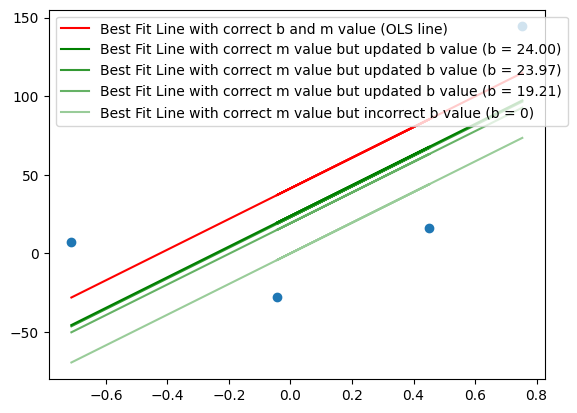

In [226]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), color= "red", label= "Best Fit Line with correct b and m value (OLS line)")
plt.plot(x, y_pred4, color= "green", label= "Best Fit Line with correct m value but updated b value (b = 24.00)")
plt.plot(x, y_pred3, color= "green", label= "Best Fit Line with correct m value but updated b value (b = 23.97)", alpha= 0.8)
plt.plot(x, y_pred2, color= "green", label= "Best Fit Line with correct m value but updated b value (b = 19.21)", alpha= 0.6)
plt.plot(x, y_pred, color= "green", label= "Best Fit Line with correct m value but incorrect b value (b = 0)", alpha= 0.4)
plt.legend(loc='upper left')

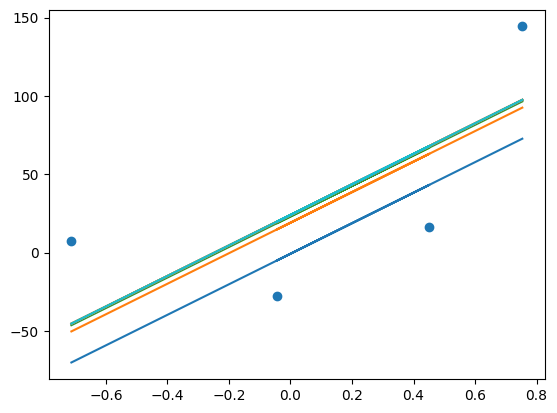

In [231]:
b = -100
m = 97.48
epochs = 10
lr = 0.1

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m * x.ravel() - b)
  step_size = lr * loss_slope
  b = b - step_size

  y_pred = (m * x + b).reshape(4)

  plt.plot(x, y_pred)

plt.scatter(x, y)

# Creating Gradient Descent Class

In [232]:
x, y = make_regression(n_samples= 100, n_features= 1, n_informative= 1, n_targets= 1, random_state= 42, noise= 20)

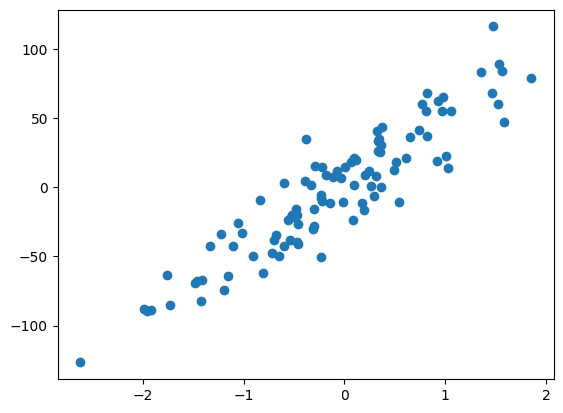

In [234]:
plt.scatter(x, y)

In [235]:
model = LinearRegression()

In [236]:
model.fit(x, y)

LinearRegression()

In [238]:
print("Slope: ", model.coef_[0])
print("Intercept: ", model.intercept_)

Slope:  47.13323966963205
Intercept:  2.3302306410539453


In [269]:
class GDRegressor:

  def __init__(self, learning_rate, epochs):
    self.m = 100
    self.b = -120
    self.learning_rate = learning_rate
    self.epochs = epochs

  def fit(self, x, y):
    for i in range(self.epochs):
      loss_slope_b = -2 * np.sum(y - self.m * x.ravel() - self.b)
      self.b = self.b - (self.learning_rate * loss_slope_b)

      loss_slope_m = -2 * np.sum((y - self.m * x.ravel() - self.b) * x.ravel())
      self.m = self.m - (self.learning_rate * loss_slope_m)

    print(self.b)
    print(self.m)

  def predict(self, x):
    return self.m * x + self.b

In [270]:
gd = GDRegressor(0.001, 100)

In [271]:
gd.fit(x, y)

2.3302307188709634
47.133239853476596


In [272]:
gd.predict(x)

array([[  46.22447994],
       [   6.43304106],
       [ -47.52311219],
       [  17.14172562],
       [ -20.25480357],
       [  32.85788994],
       [ -19.51214655],
       [  27.90284339],
       [  31.16051595],
       [  49.6299875 ],
       [  41.06915859],
       [  74.82287711],
       [  37.13655316],
       [  -8.02361706],
       [ -35.77669219],
       [   6.65521341],
       [ -90.03537126],
       [  26.52218775],
       [  50.9245785 ],
       [-121.14684363],
       [  25.74197803],
       [   6.90581014],
       [ -19.62112146],
       [  45.47609829],
       [  76.07695543],
       [  71.41100569],
       [ -25.97981672],
       [   0.64163342],
       [ -26.03015136],
       [ -54.05086301],
       [  19.16210321],
       [  20.03809553],
       [  14.63461148],
       [ -22.63908403],
       [ -40.46788583],
       [  11.60893857],
       [ -11.76295445],
       [  19.37530823],
       [  41.09943735],
       [ -11.41824075],
       [  19.36397648],
       [ -29.575

# Gradient Descent Using Scikit-Learn

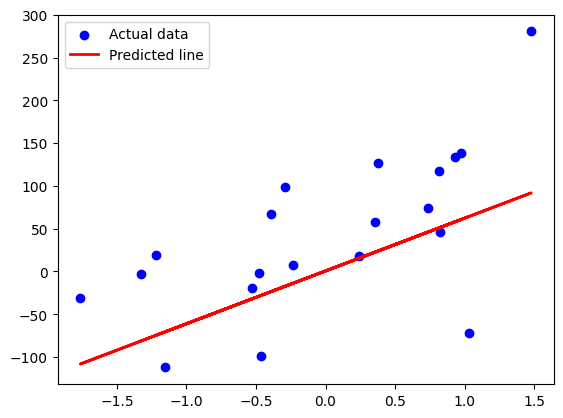

In [277]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X, y = make_regression(n_samples= 100, n_features= 1, n_targets= 1, n_informative= 1, noise= 80, random_state= 42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SGD (Gradient Descent)
sgd_reg = SGDRegressor(max_iter=1000, eta0=0.01, learning_rate="invscaling", random_state=42)
sgd_reg.fit(X_train_scaled, y_train.ravel())  # ravel() converts to 1D

# Predict
y_pred = sgd_reg.predict(X_test_scaled)

# Plot results
plt.scatter(X_test, y_test, label="Actual data", color="blue")
plt.plot(X_test, y_pred, label="Predicted line", color="red", linewidth=2)
plt.legend()
plt.show()